In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [58]:
df=pd.read_csv('train.csv',usecols=['Survived','Pclass','Age','Fare','Embarked'])
df

,Survived,Pclass,Age,Fare,Embarked
0,0,3,22.0,7.2500,S
1,1,1,38.0,71.2833,C
2,1,3,26.0,7.9250,S
3,1,1,35.0,53.1000,S
4,0,3,35.0,8.0500,S
...,...,...,...,...,...
886,0,2,27.0,13.0000,S
887,1,1,19.0,30.0000,S
888,0,3,NaN,23.4500,S
889,1,1,26.0,30.0000,C


In [59]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
Embarked      2
dtype: int64

In [60]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\rayyy\AppData\Local\Temp\ipykernel_20684\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [61]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\rayyy\AppData\Local\Temp\ipykernel_20684\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [62]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Embarked    0
dtype: int64

### Analyzing the given data 

In [63]:
def plot_distriubution(col):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[col],dist='norm',plot=plt)

    plt.show()


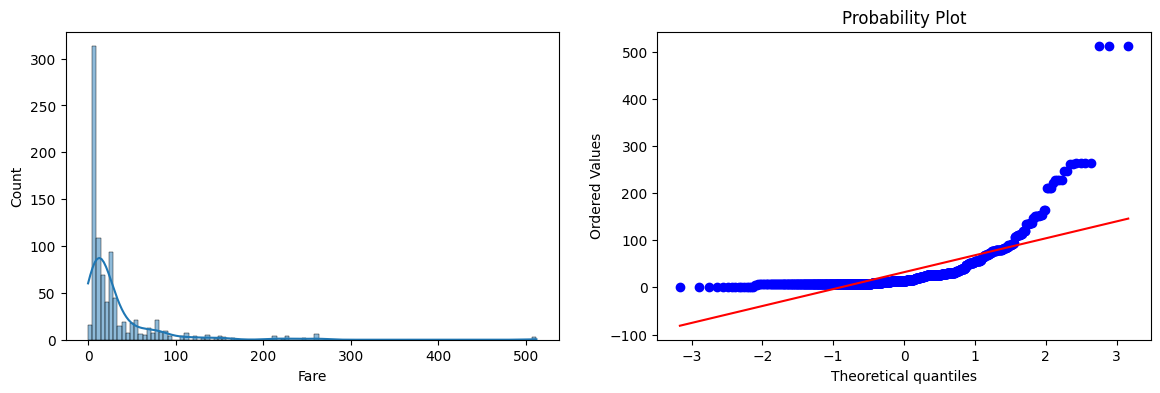

In [64]:
plot_distriubution('Fare')

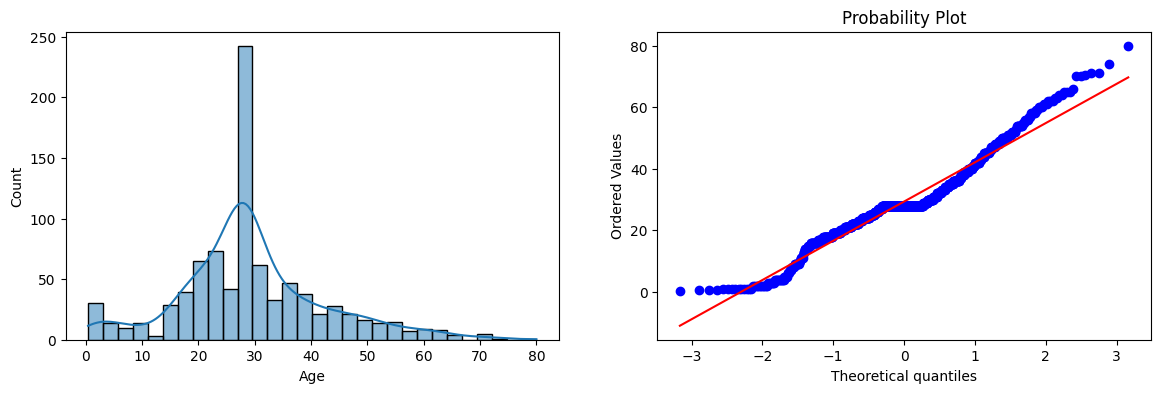

In [65]:
plot_distriubution('Age')

### Train-Test Split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

### Predicting without applying scaling and function transformers

In [67]:
tnf1=ColumnTransformer(transformers=[
    ('ohe_embarked',OneHotEncoder(),[3]),
],remainder='passthrough')

In [68]:
pipe1=Pipeline([
    ('tnf1',tnf1),
    ('model',LogisticRegression(max_iter=1000))
])

pipe2=Pipeline([
    ('tnf1',tnf1),
    ('model',DecisionTreeClassifier())
])

In [69]:
pipe1.fit(x_train,y_train)

,steps,"[('tnf1', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
pipe2.fit(x_train,y_train)

,steps,"[('tnf1', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
y_pred1=pipe1.predict(x_test)
y_pred2=pipe2.predict(x_test)
print('Logistic Regression Accuracy:',accuracy_score(y_test,y_pred1))
print('Decision Tree Classifier Accuracy:',accuracy_score(y_test,y_pred2))

Logistic Regression Accuracy: 0.7318435754189944
Decision Tree Classifier Accuracy: 0.6815642458100558


In [72]:
print(cross_val_score(pipe1,x_train,y_train,cv=5).mean())
print(cross_val_score(pipe2,x_train,y_train,cv=5).mean())

0.6994090416625628
0.6476115433861913


### Prediction after scaling the data

In [73]:
tnf2=ColumnTransformer(transformers=[
    ('scaling',StandardScaler(),[1,2])
],remainder='passthrough')

In [74]:
pipe1_scaled=Pipeline([
    ('tnf1',tnf1),
    ('tnf2',tnf2),
    ('model',LogisticRegression(max_iter=1000))
])

pipe2_scaled=Pipeline([
    ('tnf1',tnf1),
    ('tnf2',tnf2),
    ('model',DecisionTreeClassifier())
])

In [75]:
pipe1_scaled.fit(x_train,y_train)

,steps,"[('tnf1', ...), ('tnf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
pipe2_scaled.fit(x_train,y_train)

,steps,"[('tnf1', ...), ('tnf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [77]:
y_pred1=pipe1_scaled.predict(x_test)
y_pred2=pipe2_scaled.predict(x_test)
print('Logistic Regression Accuracy:',accuracy_score(y_test,y_pred1))
print('Decision Tree Classifier Accuracy:',accuracy_score(y_test,y_pred2))

Logistic Regression Accuracy: 0.7318435754189944
Decision Tree Classifier Accuracy: 0.6759776536312849


In [78]:
print(cross_val_score(pipe1_scaled,x_train,y_train,cv=5).mean())
print(cross_val_score(pipe2_scaled,x_train,y_train,cv=5).mean())

0.6994090416625628
0.6475918447749434


### After applying Function Transformer

In [79]:
tnf3=ColumnTransformer(transformers=[
    ('fun_trans',FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True),[1,2])
    ],remainder='passthrough')

In [80]:
pipe1_trans=Pipeline([
    ('tnf1',tnf1),
    ('tnf3',tnf3),
    ('model',LogisticRegression(max_iter=1000))
])
pipe2_trans=Pipeline([
    ('tnf1',tnf1),
    ('tnf3',tnf3),
    ('model',DecisionTreeClassifier())
])


In [81]:
pipe1_trans.fit(x_train,y_train)


,steps,"[('tnf1', ...), ('tnf3', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [82]:
pipe2_trans.fit(x_train,y_train)

,steps,"[('tnf1', ...), ('tnf3', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [83]:
y1_pred_trans=pipe1_trans.predict(x_test)
y2_pred_trans=pipe2_trans.predict(x_test)
print('Logistic Regression with Log Transformation Accuracy:',accuracy_score(y_test,y1_pred_trans))
print('Decision Tree Classifier with Log Transformation Accuracy:',accuracy_score(y_test,y2_pred_trans))

Logistic Regression with Log Transformation Accuracy: 0.7318435754189944
Decision Tree Classifier with Log Transformation Accuracy: 0.6815642458100558


### Overall comparision

In [84]:
print("Logistic Regression ",cross_val_score(pipe1,x_train,y_train,cv=5).mean())
print("Logistic Regression after Scaling ",cross_val_score(pipe1_scaled,x_train,y_train,cv=5).mean())
print("Logistic Regression after FunctionTranformer ",cross_val_score(pipe1_trans,x_train,y_train,cv=5).mean())
print("Decision Tree Classifier ",cross_val_score(pipe2,x_train,y_train,cv=5).mean())
print("Decision Tree Classifier after Scaling ",cross_val_score(pipe2_scaled,x_train,y_train,cv=5).mean())
print("Decision Tree Classifier after FunctionTranformer ",cross_val_score(pipe2_trans,x_train,y_train,cv=5).mean())

Logistic Regression  0.6994090416625628
Logistic Regression after Scaling  0.6994090416625628
Logistic Regression after FunctionTranformer  0.7008076430611642
Decision Tree Classifier  0.646173544765094
Decision Tree Classifier after Scaling  0.6447946419777406
Decision Tree Classifier after FunctionTranformer  0.6532157982862208
